## Ridge regression(L2)
### 가중치의 제곱의 합이 특정 값 이하가 되도록 규제한다. 특정 변수의 중요도가 아무리 크더라도, 극단으로 치우치지 않는다. but overfitting
###
## Lasso regression(L1)
### 가중치의 절대값의 합이 특정 값 이하가 되도록 규제한다.
###
### 제곱 -> 수리적 이득, 절댓값 -> scale이 같음으로 인한 이점

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes #diabete

In [92]:
diabete=load_diabetes()
df=pd.DataFrame(diabete.data, columns=diabete.feature_names)
df['degree']=diabete.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,degree
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [94]:
input=diabete.data
output=df['degree']

In [95]:
input.shape

(442, 10)

In [96]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input,output)

In [97]:
from sklearn.linear_model import Ridge, Lasso
RG=Ridge(alpha=0.1)#high alpha, high regulation
RG.fit(train_input,train_output)
LS=Lasso(alpha=0.1)#alpha
LS.fit(train_input,train_output)

Lasso(alpha=0.1)

In [98]:
np.corrcoef(RG.predict(test_input),test_output)

array([[1.        , 0.70066633],
       [0.70066633, 1.        ]])

In [99]:
np.corrcoef(LS.predict(test_input),test_output)

array([[1.        , 0.69679367],
       [0.69679367, 1.        ]])

In [100]:
RG.n_features_in_,LS.n_features_in_

(10, 10)

In [101]:
diabete.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [102]:
RG.coef_

array([  -6.57834463, -217.31475971,  548.48857364,  284.07249645,
        -98.63805598,  -76.93242632, -145.42515016,  131.73210566,
        426.30807634,   97.51031084])

In [103]:
LS.coef_

array([  -0.        , -176.86807186,  605.90559418,  258.85359917,
        -87.77794855,   -0.        , -166.13567319,    0.        ,
        486.17771499,   40.97170512])

In [104]:
RG2=Ridge(alpha=1)#high alpha, high regulation
RG2.fit(train_input,train_output)
LS2=Lasso(alpha=1)#alpha
LS2.fit(train_input,train_output)

Lasso(alpha=1)

In [105]:
np.corrcoef(RG2.predict(test_input),test_output)

array([[1.        , 0.70465079],
       [0.70465079, 1.        ]])

In [106]:
np.corrcoef(LS2.predict(test_input),test_output)

array([[1.        , 0.65555652],
       [0.65555652, 1.        ]])

In [107]:
RG3=Ridge(alpha=5)#high alpha, high regulation
RG3.fit(train_input,train_output)
LS3=Lasso(alpha=5)#alpha
LS3.fit(train_input,train_output)

Lasso(alpha=5)

In [108]:
np.corrcoef(RG3.predict(test_input),test_output)

array([[1.        , 0.68706142],
       [0.68706142, 1.        ]])

In [109]:
np.corrcoef(LS3.predict(test_input),test_output)

array([[1.00000000e+00, 1.70765605e-16],
       [1.70765605e-16, 1.00000000e+00]])

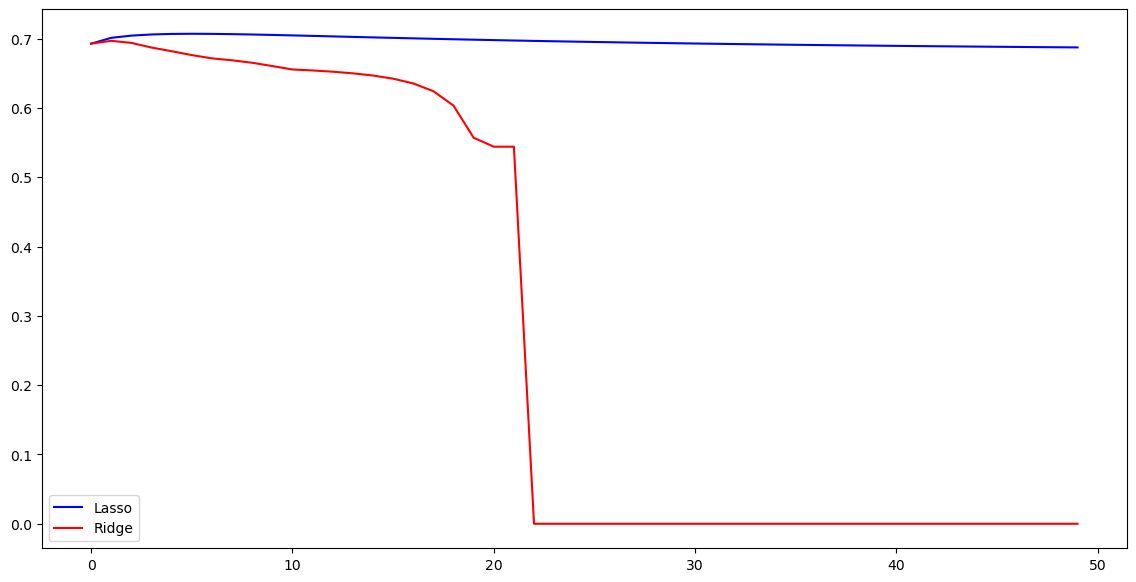

In [134]:
RG_corr=[]
LS_corr=[]
i_num=0
for i in np.arange(0.01,5.0,0.1):
  RG=Ridge(alpha=i)
  RG.fit(train_input,train_output)
  LS=Lasso(alpha=i)
  LS.fit(train_input,train_output)
  RG_corr.append(np.corrcoef(RG.predict(test_input),test_output)[0][1])
  LS_corr.append(np.corrcoef(LS.predict(test_input),test_output)[0][1])
  i_num+=1

plt.figure(figsize=(14,7))
plt.plot(range(i_num),RG_corr,'b', label='Lasso')
plt.plot(range(i_num),LS_corr,'r', label='Ridge')
plt.legend()
plt.show()